# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans

# GET THE DATA

In [2]:
train= pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')
test_ids= test['customer_id']

# EDA AND PREPROCESS

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [4]:
train.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [5]:
count_features= ['age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'occupation_type', 'total_family_members', 'migrant_worker', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default']

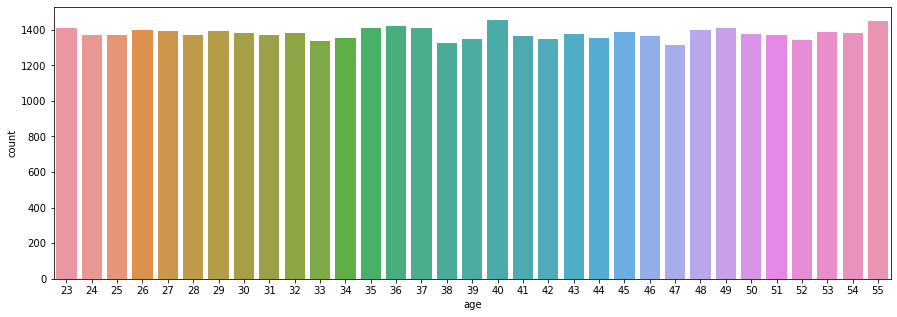

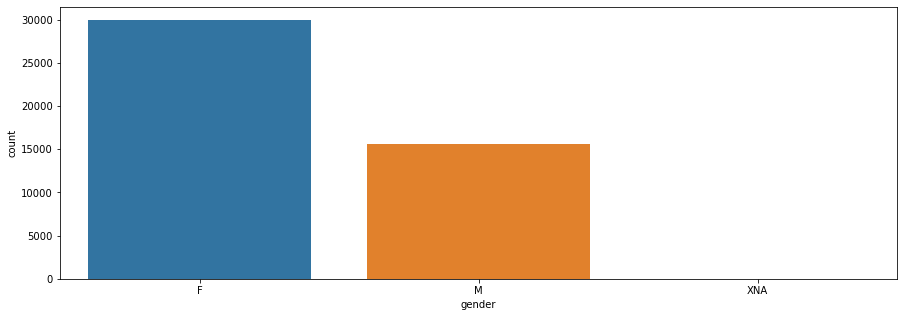

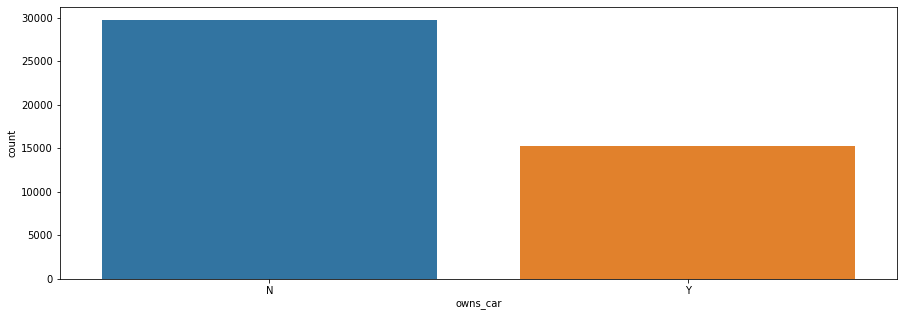

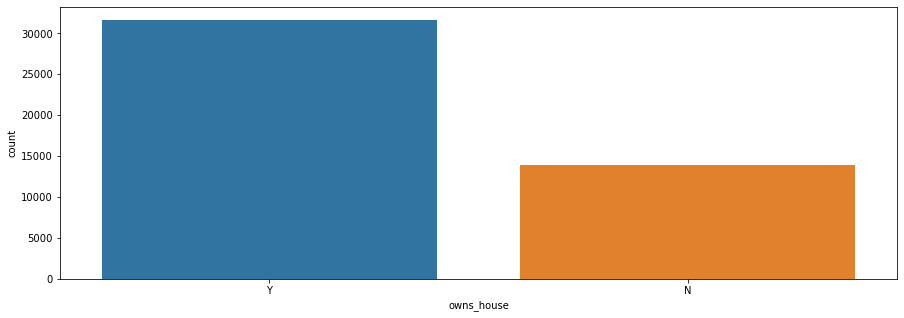

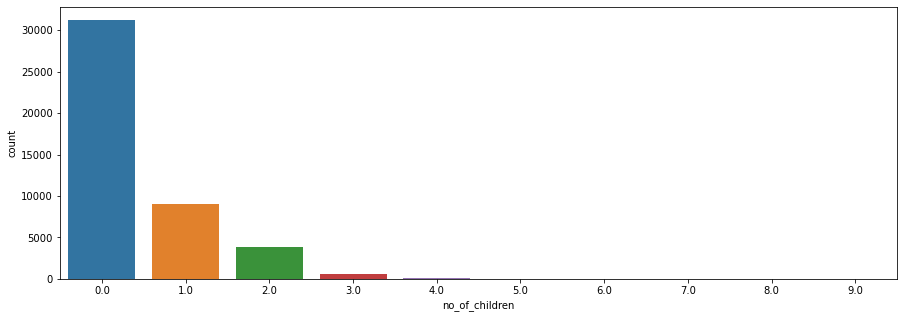

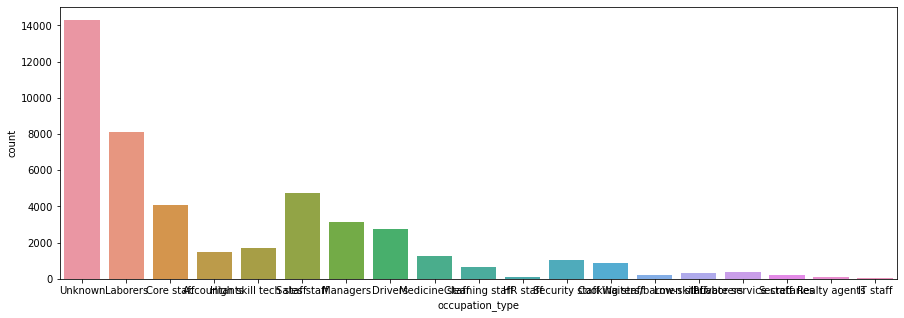

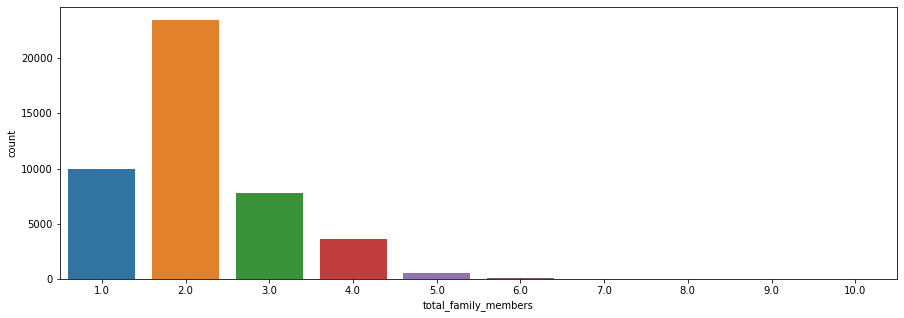

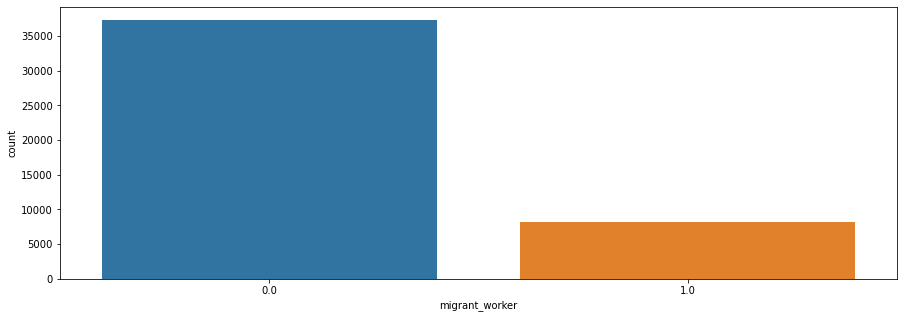

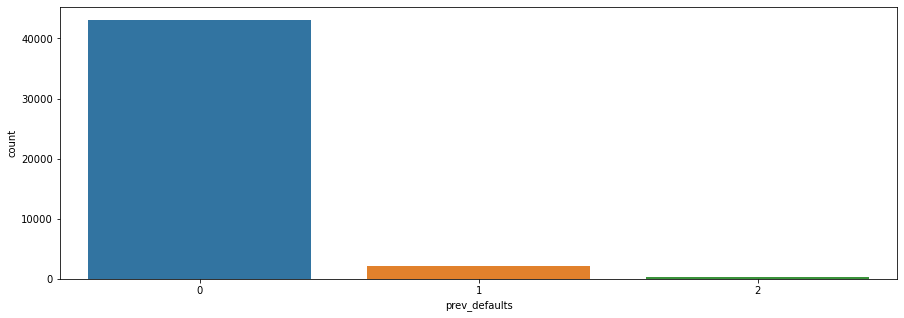

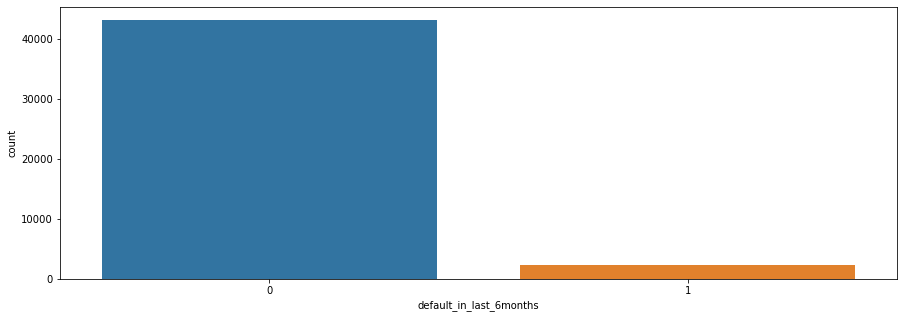

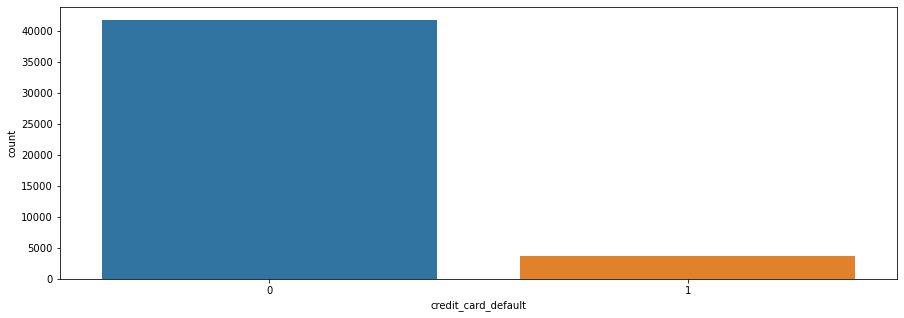

In [6]:
for i in count_features:
    plt.figure(figsize= (15, 5))
    sns.countplot(x= train[i]) 
    plt.show()

In [7]:
train[train['gender']== 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [8]:
train.loc[28498, 'gender']= 'M'

In [9]:
box_features= ['age', 'no_of_children', 'net_yearly_income',
       'no_of_days_employed', 'total_family_members',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score']

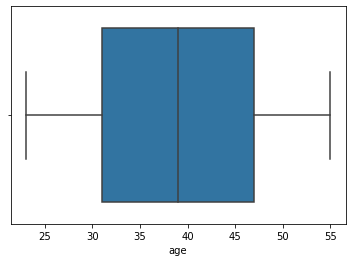

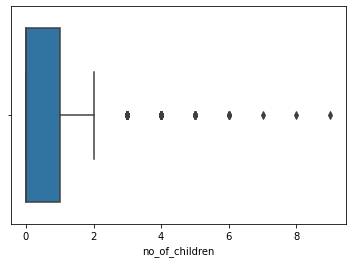

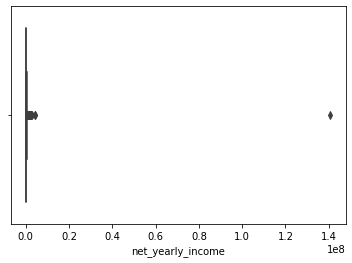

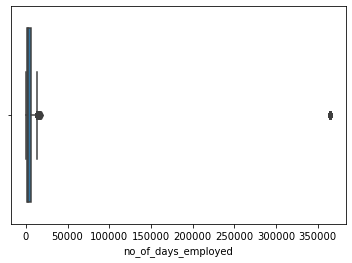

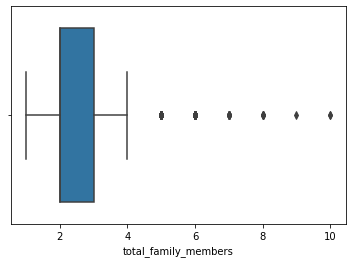

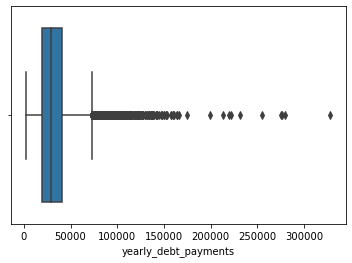

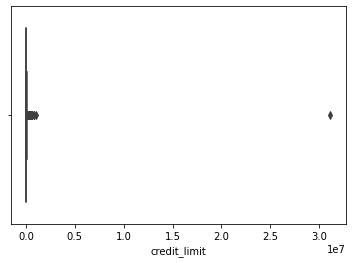

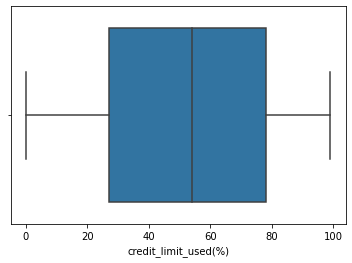

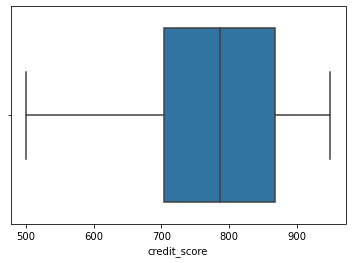

In [10]:
for i in box_features:
    sns.boxplot(x= train[i])
    plt.show()

In [11]:
train[train['net_yearly_income']>= 1e8]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
26662,CST_114967,Jonathan Stempel,51,F,N,Y,1.0,1.407590e+08,924.0,Laborers,3.0,0.0,32825.6,31129970.49,82,526.0,0,1,1


In [12]:
train[train['credit_limit']>= 1e7]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
26662,CST_114967,Jonathan Stempel,51,F,N,Y,1.0,1.407590e+08,924.0,Laborers,3.0,0.0,32825.6,31129970.49,82,526.0,0,1,1


In [13]:
train= train.drop(26662, axis= 0)

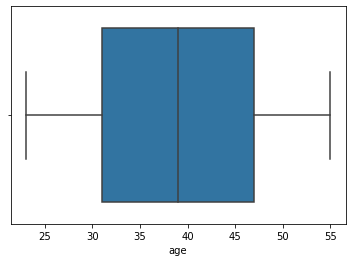

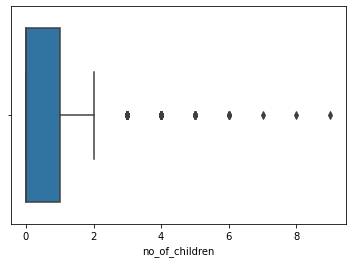

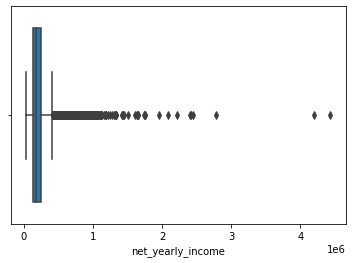

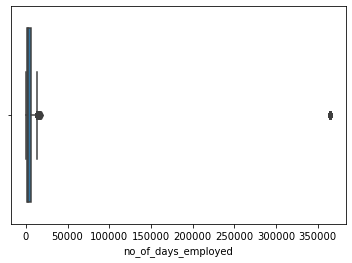

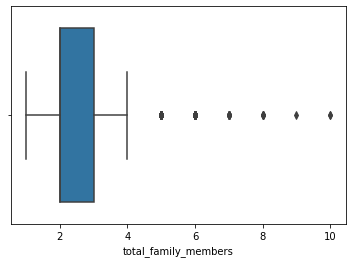

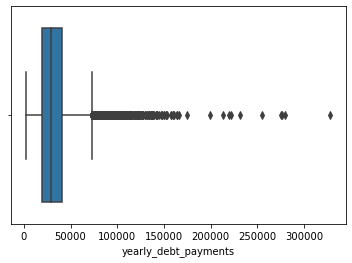

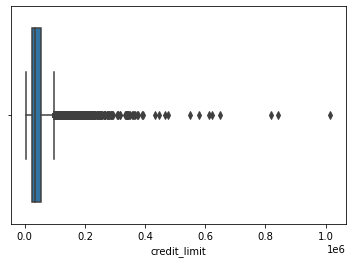

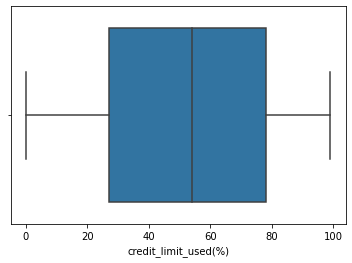

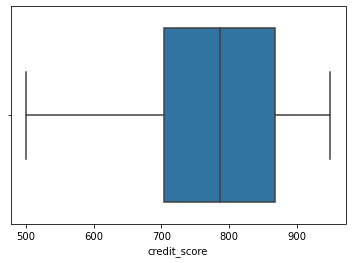

In [14]:
for i in box_features:
    sns.boxplot(x= train[i])
    plt.show()

In [15]:
t= train['no_of_days_employed']

In [16]:
s= t.loc[t> 300000]

In [17]:
s.shape

(8098,)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Count'>

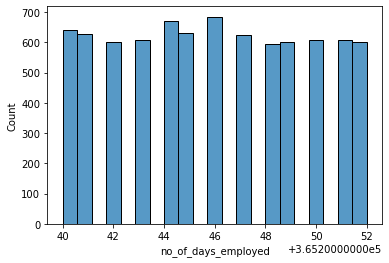

In [18]:
sns.histplot(s)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Count'>

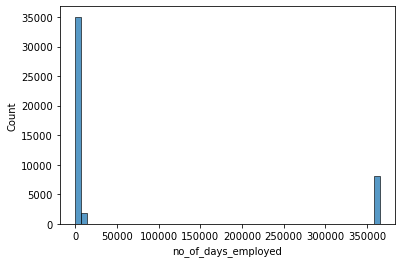

In [19]:
sns.histplot(train['no_of_days_employed'], bins= 50)

In [20]:
u= t.loc[t < 300000]

In [21]:
train.loc[train['no_of_days_employed']> 300000, 'no_of_days_employed']= u.mean()

In [22]:
categorical_features= ['gender', 'owns_car', 'owns_house', 'occupation_type']

In [23]:
for i in categorical_features:
    df1= pd.get_dummies(train[i], prefix= '{}'.format(i))
    train= pd.concat([train, df1], axis= 1)
    train= train.drop([i], axis= 1)

In [24]:
train= train.drop(['gender_M', 'owns_car_N', 'owns_house_N'], axis= 1)

In [25]:
cor= train.corr()

In [26]:
cor['credit_card_default'].sort_values(ascending= False)

credit_card_default                      1.000000
default_in_last_6months                  0.776014
prev_defaults                            0.771817
credit_limit_used(%)                     0.326611
occupation_type_Laborers                 0.039837
migrant_worker                           0.034052
occupation_type_Drivers                  0.033097
occupation_type_Low-skill Laborers       0.024170
no_of_children                           0.023632
occupation_type_Sales staff              0.019623
occupation_type_Cooking staff            0.017183
occupation_type_Security staff           0.012354
total_family_members                     0.010687
occupation_type_Cleaning staff           0.010064
occupation_type_Waiters/barmen staff     0.005456
occupation_type_Realty agents            0.003078
occupation_type_HR staff                 0.001299
age                                     -0.001076
occupation_type_Private service staff   -0.002118
occupation_type_Medicine staff          -0.002197


In [27]:
test[test['gender']== 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
3510,CST_141289,Jan,25,XNA,Y,Y,0.0,219109.11,10041.0,Unknown,2.0,0.0,22295.99,27709.34,3,807.0,0,0


In [28]:
test.loc[3510, 'gender']= 'F'

In [29]:
for i in categorical_features:
    df1= pd.get_dummies(test[i], prefix= '{}'.format(i))
    test= pd.concat([test, df1], axis= 1)
    test= test.drop([i], axis= 1)
    
test= test.drop(['gender_M', 'owns_car_N', 'owns_house_N'], axis= 1)

In [30]:
y= train['credit_card_default']
X= train.drop(['customer_id', 'name', 'credit_card_default'], axis= 1)
test= test.drop(['customer_id', 'name'], axis= 1)

In [31]:
scaler= RobustScaler()
scaler.fit(X)
X= scaler.transform(X)
test= scaler.transform(test)

# TRAIN AND MAKE PREDS

In [32]:
kfold= StratifiedKFold(n_splits= 10, shuffle= True, random_state= 2021)

In [33]:
oof_preds= np.empty(train.shape[0])
test_preds= np.empty((test.shape[0], 10))
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, X_val= X[train_idx], X[val_idx]
    y_train, y_val= y.iloc[train_idx], y.iloc[val_idx]
    hgbc= HistGradientBoostingClassifier(loss= 'binary_crossentropy',
                                     learning_rate= 0.05,
                                     max_iter= 150,
                                     early_stopping= False,
                                     validation_fraction= 0.1,
                                     n_iter_no_change= 50,
                                     random_state= 2021,
                                     verbose= 500)
    hgbc.fit(X_train, y_train)
    oof_preds[val_idx]= hgbc.predict(X_val)
    test_preds[:, fold]= hgbc.predict(test)

Binning 0.011 GB of training data: 0.168 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 11, in 0.019s
[2/150] 1 tree, 31 leaves, max depth = 11, in 0.020s
[3/150] 1 tree, 31 leaves, max depth = 11, in 0.020s
[4/150] 1 tree, 31 leaves, max depth = 10, in 0.018s
[5/150] 1 tree, 31 leaves, max depth = 14, in 0.017s
[6/150] 1 tree, 31 leaves, max depth = 10, in 0.017s
[7/150] 1 tree, 31 leaves, max depth = 14, in 0.017s
[8/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[9/150] 1 tree, 31 leaves, max depth = 12, in 0.017s
[10/150] 1 tree, 31 leaves, max depth = 13, in 0.017s
[11/150] 1 tree, 31 leaves, max depth = 12, in 0.017s
[12/150] 1 tree, 31 leaves, max depth = 16, in 0.018s
[13/150] 1 tree, 31 leaves, max depth = 16, in 0.017s
[14/150] 1 tree, 31 leaves, max depth = 13, in 0.018s
[15/150] 1 tree, 31 leaves, max depth = 12, in 0.016s
[16/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[17/150] 1 tree, 31 leaves, max depth = 12, in 0.016s
[18/150] 1 tree

Binning 0.011 GB of training data: 0.130 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 12, in 0.016s
[2/150] 1 tree, 31 leaves, max depth = 11, in 0.017s
[3/150] 1 tree, 31 leaves, max depth = 14, in 0.131s
[4/150] 1 tree, 31 leaves, max depth = 13, in 0.039s
[5/150] 1 tree, 31 leaves, max depth = 13, in 0.018s
[6/150] 1 tree, 31 leaves, max depth = 12, in 0.015s
[7/150] 1 tree, 31 leaves, max depth = 12, in 0.017s
[8/150] 1 tree, 31 leaves, max depth = 11, in 0.017s
[9/150] 1 tree, 31 leaves, max depth = 10, in 0.018s
[10/150] 1 tree, 31 leaves, max depth = 15, in 0.017s
[11/150] 1 tree, 31 leaves, max depth = 14, in 0.031s
[12/150] 1 tree, 31 leaves, max depth = 12, in 0.021s
[13/150] 1 tree, 31 leaves, max depth = 13, in 0.014s
[14/150] 1 tree, 31 leaves, max depth = 13, in 0.016s
[15/150] 1 tree, 31 leaves, max depth = 11, in 0.016s
[16/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[17/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[18/150] 1 tree

Binning 0.011 GB of training data: 0.135 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 10, in 0.017s
[2/150] 1 tree, 31 leaves, max depth = 16, in 0.018s
[3/150] 1 tree, 31 leaves, max depth = 11, in 0.016s
[4/150] 1 tree, 31 leaves, max depth = 12, in 0.016s
[5/150] 1 tree, 31 leaves, max depth = 11, in 0.016s
[6/150] 1 tree, 31 leaves, max depth = 12, in 0.016s
[7/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[8/150] 1 tree, 31 leaves, max depth = 12, in 0.014s
[9/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[10/150] 1 tree, 31 leaves, max depth = 14, in 0.017s
[11/150] 1 tree, 31 leaves, max depth = 14, in 0.011s
[12/150] 1 tree, 31 leaves, max depth = 12, in 0.014s
[13/150] 1 tree, 31 leaves, max depth = 12, in 0.013s
[14/150] 1 tree, 31 leaves, max depth = 15, in 0.015s
[15/150] 1 tree, 31 leaves, max depth = 15, in 0.016s
[16/150] 1 tree, 31 leaves, max depth = 18, in 0.016s
[17/150] 1 tree, 31 leaves, max depth = 12, in 0.014s
[18/150] 1 tree

Time spent predicting:           0.021s
Binning 0.011 GB of training data: 0.136 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 13, in 0.017s
[2/150] 1 tree, 31 leaves, max depth = 13, in 0.018s
[3/150] 1 tree, 31 leaves, max depth = 12, in 0.018s
[4/150] 1 tree, 31 leaves, max depth = 12, in 0.020s
[5/150] 1 tree, 31 leaves, max depth = 15, in 0.012s
[6/150] 1 tree, 31 leaves, max depth = 13, in 0.014s
[7/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[8/150] 1 tree, 31 leaves, max depth = 12, in 0.015s
[9/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[10/150] 1 tree, 31 leaves, max depth = 13, in 0.017s
[11/150] 1 tree, 31 leaves, max depth = 15, in 0.015s
[12/150] 1 tree, 31 leaves, max depth = 12, in 0.015s
[13/150] 1 tree, 31 leaves, max depth = 14, in 0.015s
[14/150] 1 tree, 31 leaves, max depth = 17, in 0.015s
[15/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[16/150] 1 tree, 31 leaves, max depth = 14, in 0.014s
[17/150] 1 tree, 31 leaves, m

[150/150] 1 tree, 31 leaves, max depth = 17, in 0.011s
Fit 150 trees in 2.202 s, (4650 total leaves)
Time spent computing histograms: 0.519s
Time spent finding best splits:  0.192s
Time spent applying splits:      0.241s
Time spent predicting:           0.019s
Binning 0.011 GB of training data: 0.118 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 11, in 0.014s
[2/150] 1 tree, 31 leaves, max depth = 10, in 0.014s
[3/150] 1 tree, 31 leaves, max depth = 11, in 0.012s
[4/150] 1 tree, 31 leaves, max depth = 13, in 0.013s
[5/150] 1 tree, 31 leaves, max depth = 16, in 0.012s
[6/150] 1 tree, 31 leaves, max depth = 12, in 0.012s
[7/150] 1 tree, 31 leaves, max depth = 11, in 0.012s
[8/150] 1 tree, 31 leaves, max depth = 14, in 0.012s
[9/150] 1 tree, 31 leaves, max depth = 16, in 0.012s
[10/150] 1 tree, 31 leaves, max depth = 12, in 0.012s
[11/150] 1 tree, 31 leaves, max depth = 14, in 0.012s
[12/150] 1 tree, 31 leaves, max depth = 15, in 0.013s
[13/150] 1 tree, 31 leav

[146/150] 1 tree, 31 leaves, max depth = 14, in 0.012s
[147/150] 1 tree, 31 leaves, max depth = 17, in 0.011s
[148/150] 1 tree, 31 leaves, max depth = 16, in 0.011s
[149/150] 1 tree, 31 leaves, max depth = 17, in 0.012s
[150/150] 1 tree, 31 leaves, max depth = 17, in 0.011s
Fit 150 trees in 2.139 s, (4650 total leaves)
Time spent computing histograms: 0.536s
Time spent finding best splits:  0.183s
Time spent applying splits:      0.237s
Time spent predicting:           0.019s
Binning 0.011 GB of training data: 0.134 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 11, in 0.012s
[2/150] 1 tree, 31 leaves, max depth = 12, in 0.012s
[3/150] 1 tree, 31 leaves, max depth = 13, in 0.011s
[4/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[5/150] 1 tree, 31 leaves, max depth = 11, in 0.013s
[6/150] 1 tree, 31 leaves, max depth = 11, in 0.013s
[7/150] 1 tree, 31 leaves, max depth = 12, in 0.013s
[8/150] 1 tree, 31 leaves, max depth = 15, in 0.014s
[9/150] 1 tree, 31 

[142/150] 1 tree, 31 leaves, max depth = 18, in 0.019s
[143/150] 1 tree, 31 leaves, max depth = 12, in 0.021s
[144/150] 1 tree, 31 leaves, max depth = 16, in 0.015s
[145/150] 1 tree, 31 leaves, max depth = 16, in 0.015s
[146/150] 1 tree, 31 leaves, max depth = 13, in 0.016s
[147/150] 1 tree, 31 leaves, max depth = 15, in 0.019s
[148/150] 1 tree, 31 leaves, max depth = 16, in 0.027s
[149/150] 1 tree, 31 leaves, max depth = 18, in 0.023s
[150/150] 1 tree, 31 leaves, max depth = 15, in 0.027s
Fit 150 trees in 2.179 s, (4650 total leaves)
Time spent computing histograms: 0.550s
Time spent finding best splits:  0.186s
Time spent applying splits:      0.242s
Time spent predicting:           0.020s
Binning 0.011 GB of training data: 0.170 s
Fitting gradient boosted rounds:
[1/150] 1 tree, 31 leaves, max depth = 13, in 0.015s
[2/150] 1 tree, 31 leaves, max depth = 10, in 0.016s
[3/150] 1 tree, 31 leaves, max depth = 11, in 0.017s
[4/150] 1 tree, 31 leaves, max depth = 13, in 0.017s
[5/150] 1 t

[138/150] 1 tree, 31 leaves, max depth = 14, in 0.018s
[139/150] 1 tree, 31 leaves, max depth = 18, in 0.018s
[140/150] 1 tree, 31 leaves, max depth = 15, in 0.018s
[141/150] 1 tree, 31 leaves, max depth = 20, in 0.017s
[142/150] 1 tree, 31 leaves, max depth = 16, in 0.017s
[143/150] 1 tree, 31 leaves, max depth = 13, in 0.017s
[144/150] 1 tree, 31 leaves, max depth = 16, in 0.018s
[145/150] 1 tree, 31 leaves, max depth = 13, in 0.018s
[146/150] 1 tree, 31 leaves, max depth = 17, in 0.019s
[147/150] 1 tree, 31 leaves, max depth = 15, in 0.018s
[148/150] 1 tree, 31 leaves, max depth = 20, in 0.017s
[149/150] 1 tree, 31 leaves, max depth = 20, in 0.022s
[150/150] 1 tree, 31 leaves, max depth = 17, in 0.022s
Fit 150 trees in 2.783 s, (4650 total leaves)
Time spent computing histograms: 0.837s
Time spent finding best splits:  0.222s
Time spent applying splits:      0.324s
Time spent predicting:           0.023s
Binning 0.011 GB of training data: 0.144 s
Fitting gradient boosted rounds:
[1/

[134/150] 1 tree, 31 leaves, max depth = 13, in 0.018s
[135/150] 1 tree, 31 leaves, max depth = 15, in 0.020s
[136/150] 1 tree, 31 leaves, max depth = 18, in 0.016s
[137/150] 1 tree, 31 leaves, max depth = 16, in 0.017s
[138/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[139/150] 1 tree, 31 leaves, max depth = 17, in 0.016s
[140/150] 1 tree, 31 leaves, max depth = 18, in 0.016s
[141/150] 1 tree, 31 leaves, max depth = 12, in 0.017s
[142/150] 1 tree, 31 leaves, max depth = 17, in 0.020s
[143/150] 1 tree, 31 leaves, max depth = 18, in 0.027s
[144/150] 1 tree, 31 leaves, max depth = 15, in 0.020s
[145/150] 1 tree, 31 leaves, max depth = 16, in 0.020s
[146/150] 1 tree, 31 leaves, max depth = 16, in 0.019s
[147/150] 1 tree, 31 leaves, max depth = 16, in 0.018s
[148/150] 1 tree, 31 leaves, max depth = 19, in 0.022s
[149/150] 1 tree, 31 leaves, max depth = 14, in 0.023s
[150/150] 1 tree, 31 leaves, max depth = 14, in 0.016s
Fit 150 trees in 3.082 s, (4650 total leaves)
Time spent computin

[130/150] 1 tree, 31 leaves, max depth = 14, in 0.016s
[131/150] 1 tree, 31 leaves, max depth = 18, in 0.017s
[132/150] 1 tree, 31 leaves, max depth = 21, in 0.019s
[133/150] 1 tree, 31 leaves, max depth = 18, in 0.017s
[134/150] 1 tree, 31 leaves, max depth = 19, in 0.015s
[135/150] 1 tree, 31 leaves, max depth = 20, in 0.016s
[136/150] 1 tree, 31 leaves, max depth = 14, in 0.016s
[137/150] 1 tree, 31 leaves, max depth = 18, in 0.016s
[138/150] 1 tree, 31 leaves, max depth = 17, in 0.017s
[139/150] 1 tree, 31 leaves, max depth = 16, in 0.017s
[140/150] 1 tree, 31 leaves, max depth = 14, in 0.014s
[141/150] 1 tree, 31 leaves, max depth = 14, in 0.017s
[142/150] 1 tree, 31 leaves, max depth = 17, in 0.014s
[143/150] 1 tree, 31 leaves, max depth = 15, in 0.018s
[144/150] 1 tree, 31 leaves, max depth = 14, in 0.038s
[145/150] 1 tree, 31 leaves, max depth = 15, in 0.022s
[146/150] 1 tree, 31 leaves, max depth = 17, in 0.024s
[147/150] 1 tree, 31 leaves, max depth = 19, in 0.027s
[148/150] 

[126/150] 1 tree, 31 leaves, max depth = 22, in 0.016s
[127/150] 1 tree, 31 leaves, max depth = 15, in 0.017s
[128/150] 1 tree, 31 leaves, max depth = 19, in 0.017s
[129/150] 1 tree, 31 leaves, max depth = 18, in 0.015s
[130/150] 1 tree, 31 leaves, max depth = 18, in 0.015s
[131/150] 1 tree, 31 leaves, max depth = 20, in 0.016s
[132/150] 1 tree, 31 leaves, max depth = 16, in 0.014s
[133/150] 1 tree, 31 leaves, max depth = 20, in 0.017s
[134/150] 1 tree, 31 leaves, max depth = 20, in 0.016s
[135/150] 1 tree, 31 leaves, max depth = 18, in 0.020s
[136/150] 1 tree, 31 leaves, max depth = 15, in 0.015s
[137/150] 1 tree, 31 leaves, max depth = 15, in 0.017s
[138/150] 1 tree, 31 leaves, max depth = 19, in 0.015s
[139/150] 1 tree, 31 leaves, max depth = 18, in 0.016s
[140/150] 1 tree, 31 leaves, max depth = 17, in 0.016s
[141/150] 1 tree, 31 leaves, max depth = 12, in 0.017s
[142/150] 1 tree, 31 leaves, max depth = 16, in 0.016s
[143/150] 1 tree, 31 leaves, max depth = 12, in 0.019s
[144/150] 

In [34]:
score= 100 * f1_score(y, oof_preds, average= 'macro')
score

92.36185891457677

In [35]:
test_preds= pd.DataFrame(test_preds).mode(axis= 1)[0]

In [36]:
test_preds

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
11378    0.0
11379    0.0
11380    0.0
11381    0.0
11382    0.0
Name: 0, Length: 11383, dtype: float64

In [37]:
sub= pd.DataFrame({'customer_id': test_ids, 'credit_card_default': test_preds})
sub.to_csv('submission_hgbc_best.csv', index= False)